<a href="https://colab.research.google.com/github/sathvikpatel0812/DAUP-2025/blob/main/2303A52L05_DAUP_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import IsolationForest


In [3]:
df = pd.read_csv("/content/dermatology_database_1.csv")

In [4]:
print("Dataset Head:\n", df.head())
print("\nDataset Info:\n")
df.info()

Dataset Head:
    erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                      

In [5]:
df.dropna(inplace=True)

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
df = df.replace('?', np.nan)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7083333333333334

SVM Classification Report:
               precision    recall  f1-score   support

           1       0.81      1.00      0.90        22
           2       0.48      1.00      0.65        14
           3       1.00      0.93      0.96        14
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        12
           6       0.67      1.00      0.80         2

    accuracy                           0.71        72
   macro avg       0.49      0.65      0.55        72
weighted avg       0.56      0.71      0.61        72



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9861111111111112

Random Forest Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        14
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         2

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.98        72
weighted avg       0.99      0.99      0.99        72



In [11]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)

outliers = iso_forest.fit_predict(X) == 1

X_clean, y_clean = X[outliers], y[outliers]

In [12]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

In [13]:
svm_model_clean = SVC(random_state=42)

svm_model_clean.fit(X_train_clean, y_train_clean)

y_pred_svm_clean = svm_model_clean.predict(X_test_clean)

svm_accuracy_clean = accuracy_score(y_test_clean, y_pred_svm_clean)

print("SVM Accuracy after outlier removal:", svm_accuracy_clean)
print("\nSVM Classification Report (Clean Data):\n", classification_report(y_test_clean, y_pred_svm_clean))

SVM Accuracy after outlier removal: 0.6176470588235294

SVM Classification Report (Clean Data):
               precision    recall  f1-score   support

           1       0.58      1.00      0.73        15
           2       0.80      0.50      0.62        16
           3       1.00      1.00      1.00        11
           4       0.20      0.50      0.29         6
           5       0.00      0.00      0.00        15
           6       0.83      1.00      0.91         5

    accuracy                           0.62        68
   macro avg       0.57      0.67      0.59        68
weighted avg       0.56      0.62      0.56        68



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
rf_model_clean = RandomForestClassifier(random_state=42)

rf_model_clean.fit(X_train_clean, y_train_clean)

y_pred_rf_clean = rf_model_clean.predict(X_test_clean)

rf_accuracy_clean = accuracy_score(y_test_clean, y_pred_rf_clean)

print("Random Forest Accuracy after outlier removal:", rf_accuracy_clean)
print("\nRandom Forest Classification Report (Clean Data):\n", classification_report(y_test_clean, y_pred_rf_clean))

Random Forest Accuracy after outlier removal: 0.9852941176470589

Random Forest Classification Report (Clean Data):
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00        11
           4       0.86      1.00      0.92         6
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00         5

    accuracy                           0.99        68
   macro avg       0.98      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68



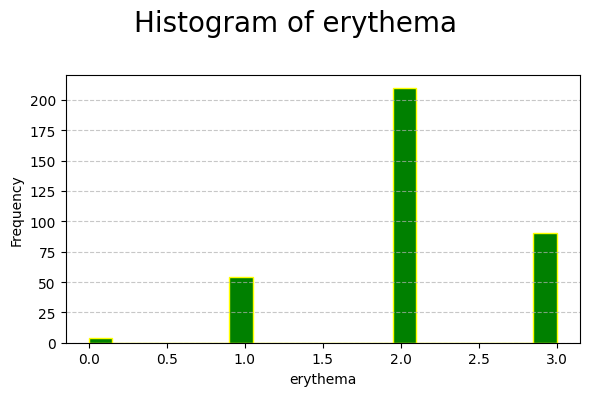

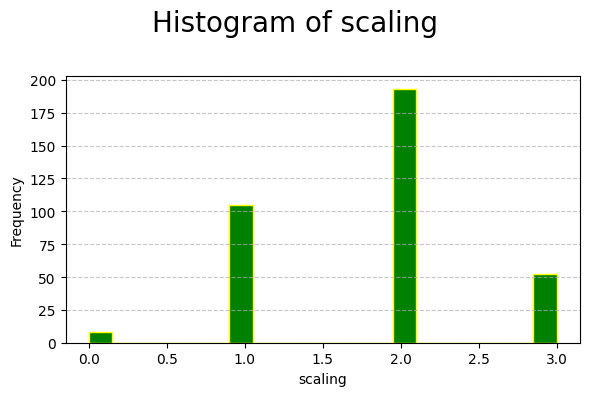

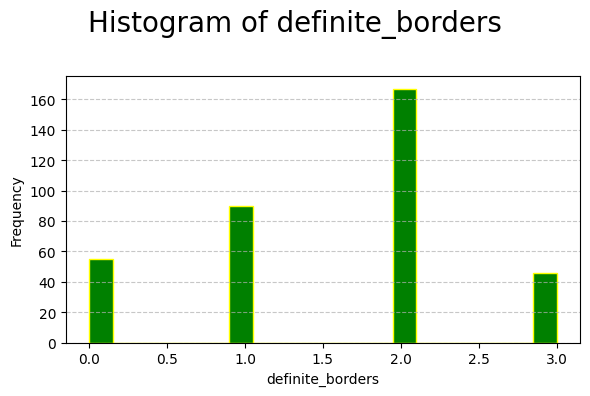

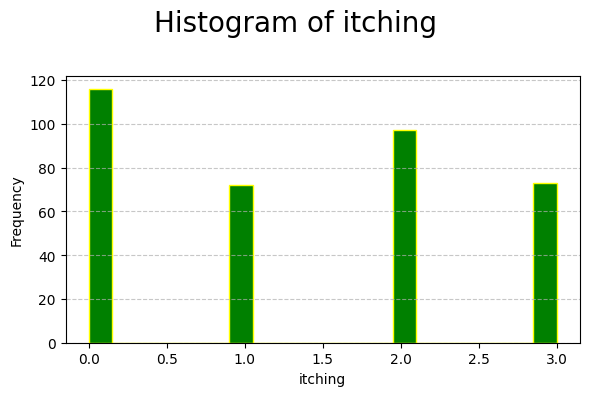

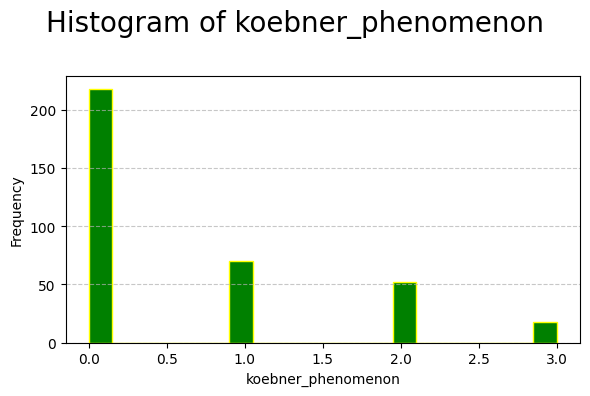

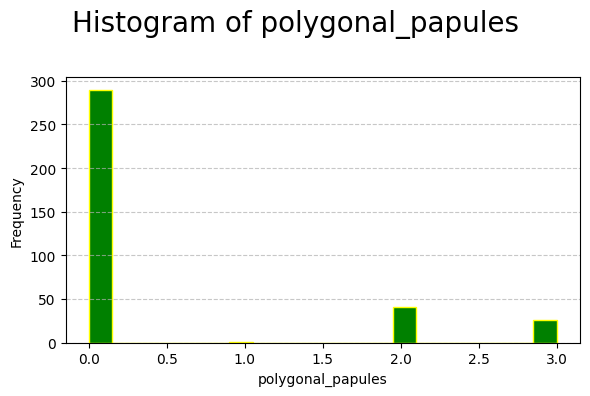

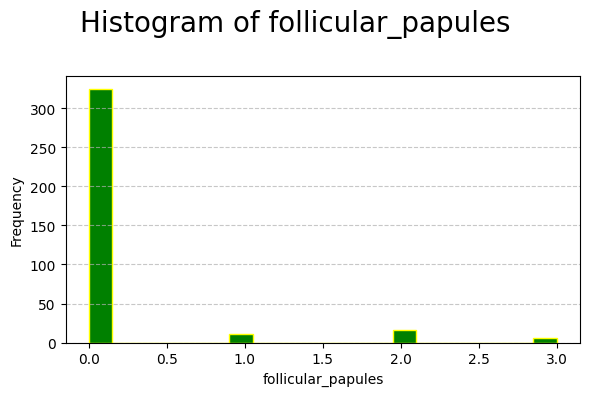

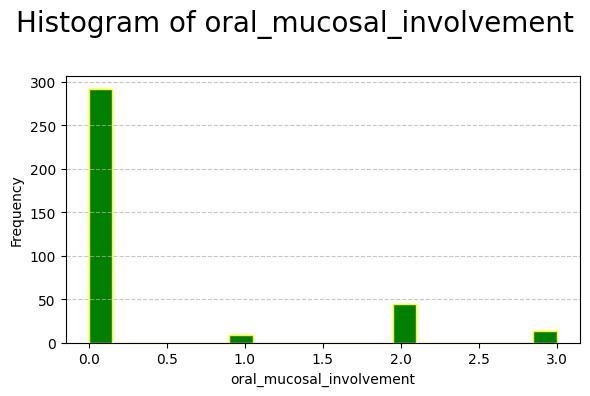

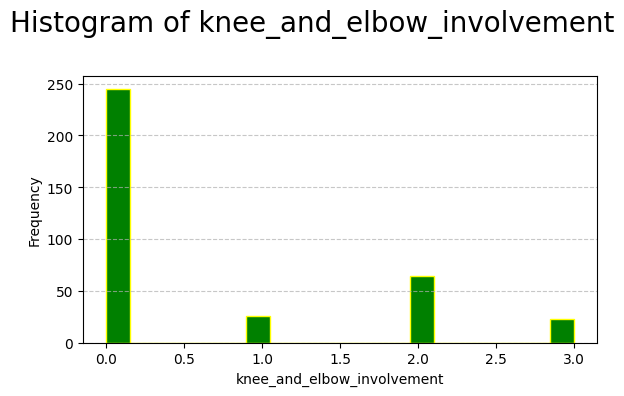

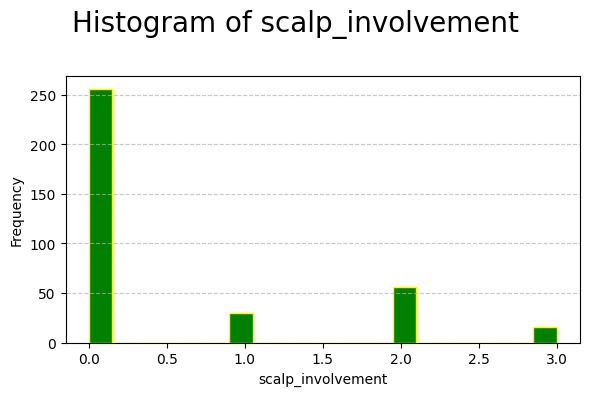

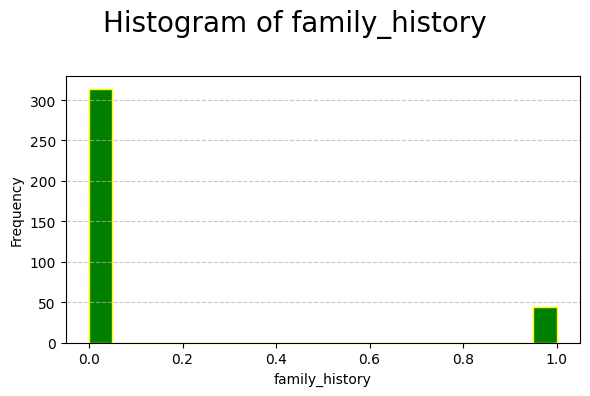

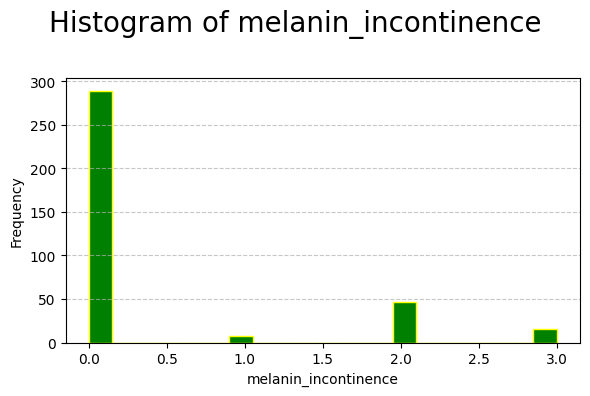

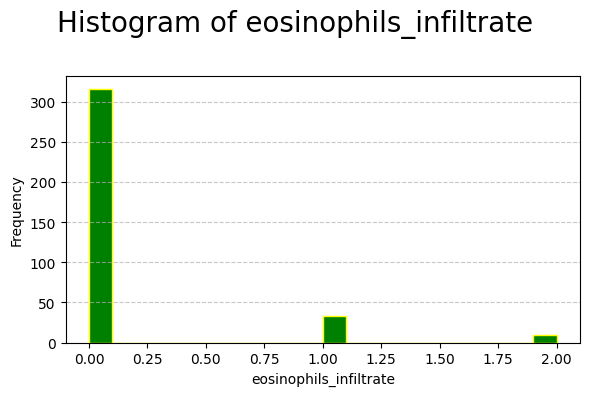

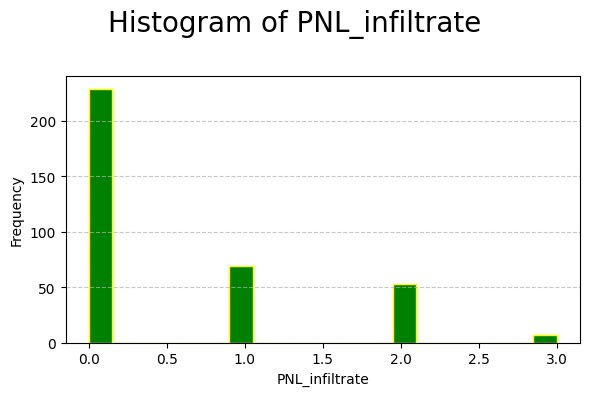

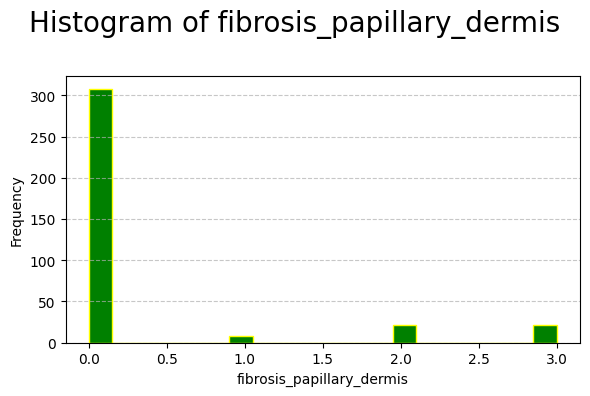

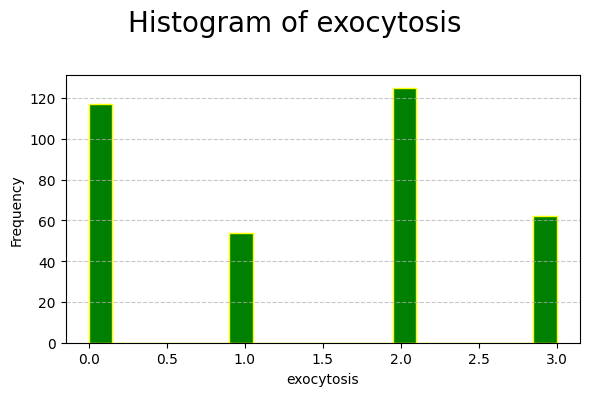

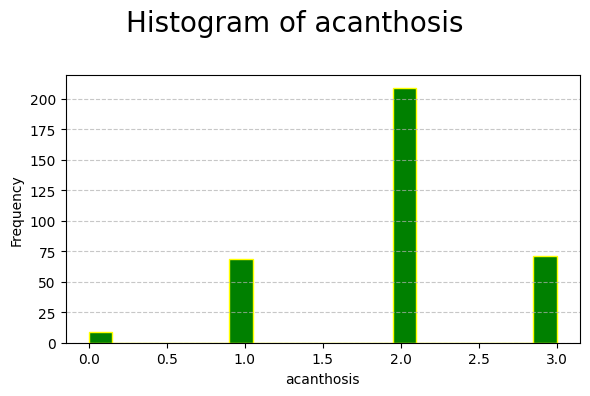

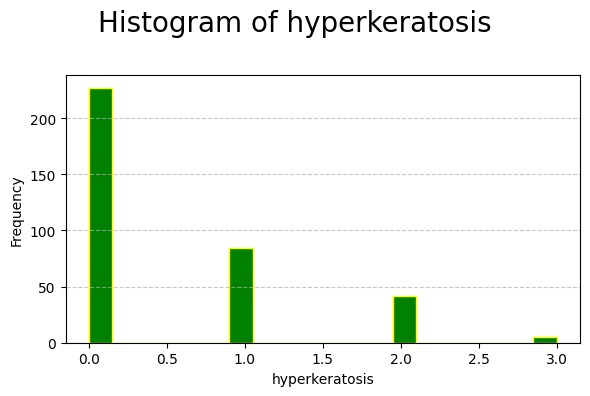

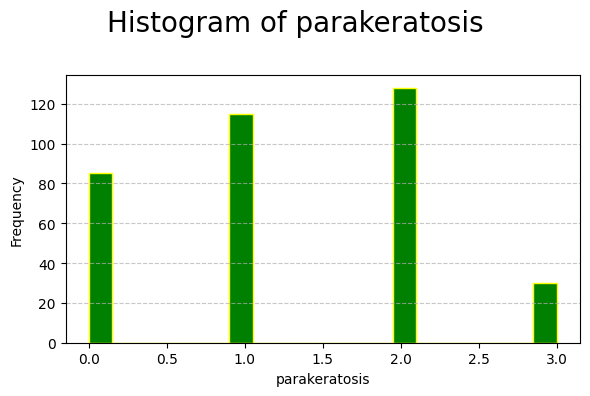

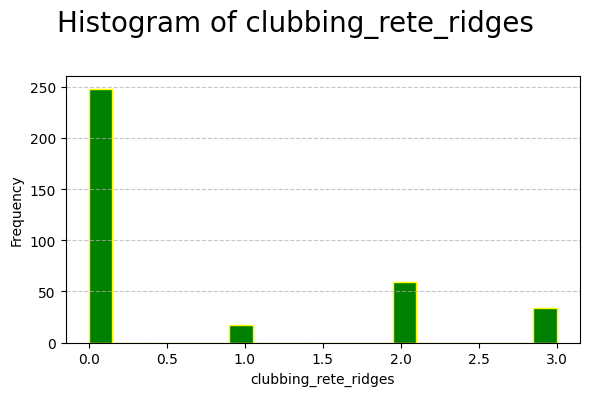

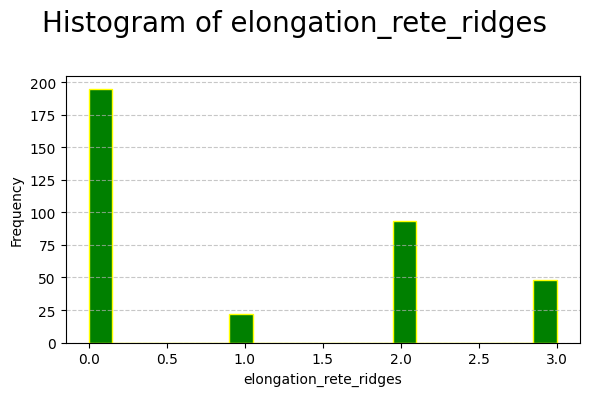

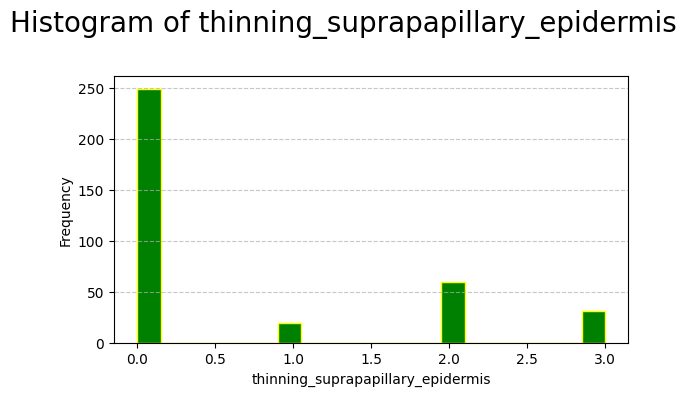

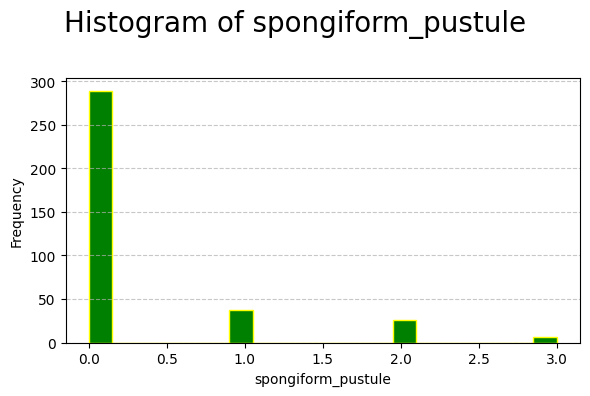

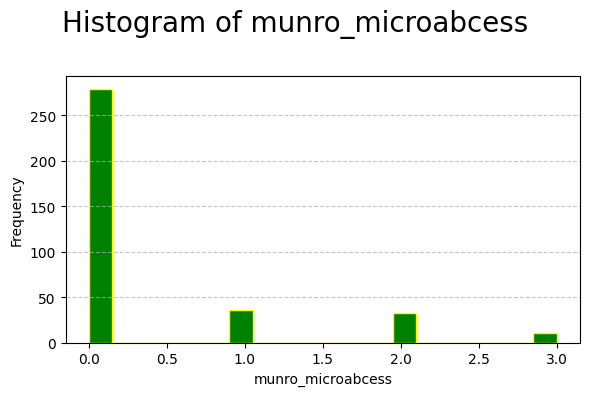

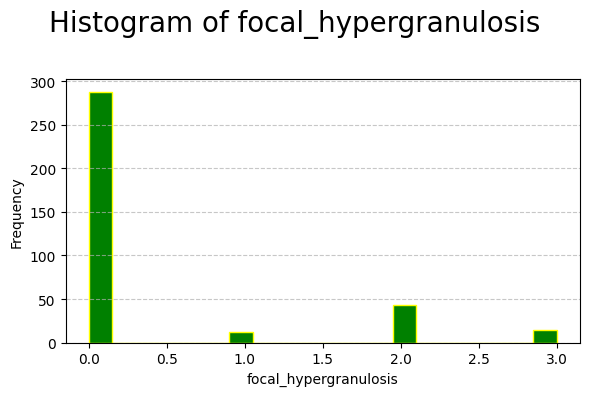

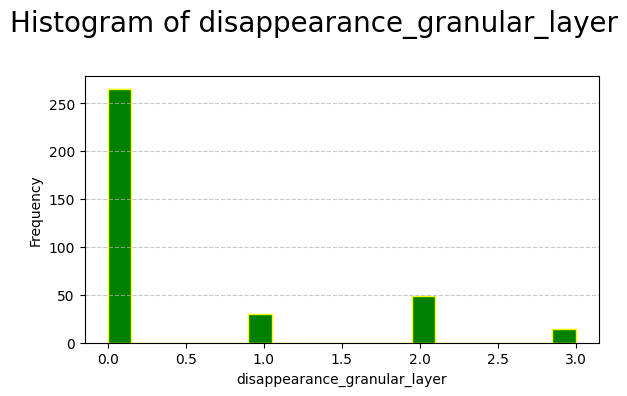

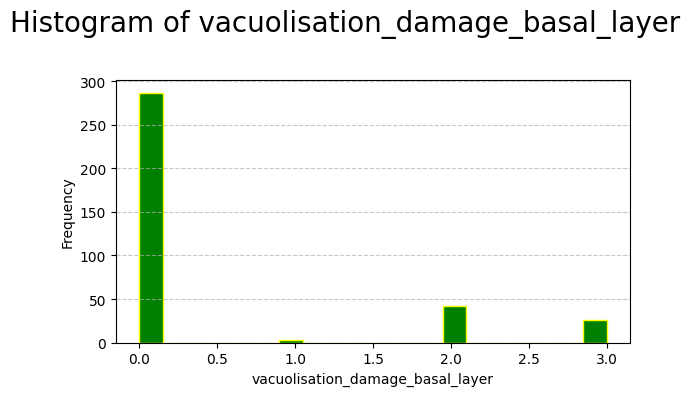

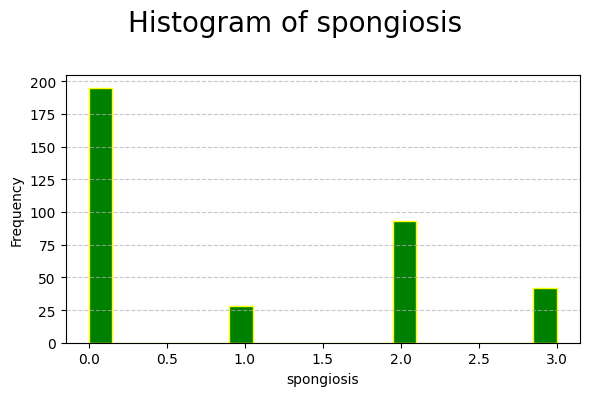

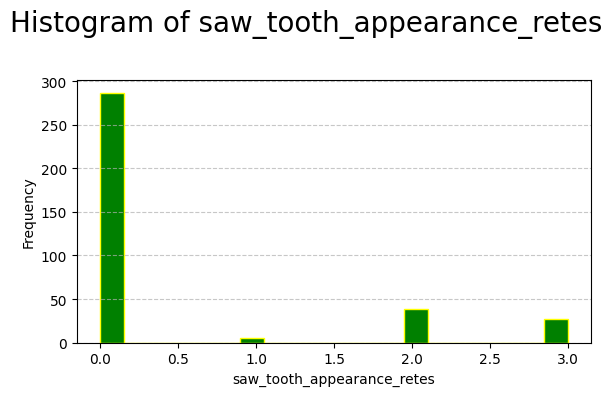

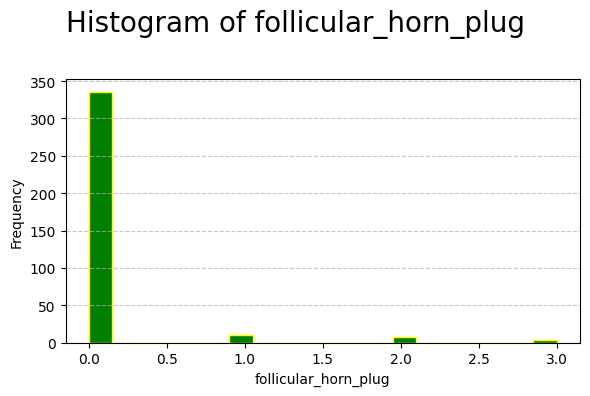

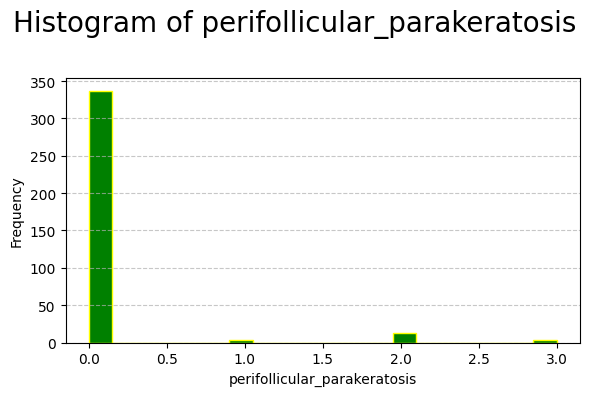

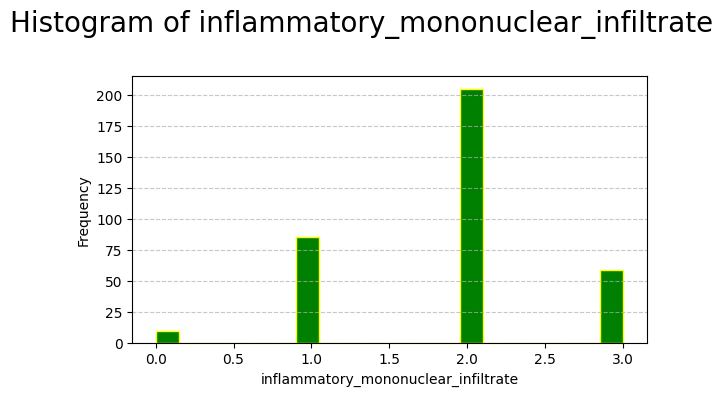

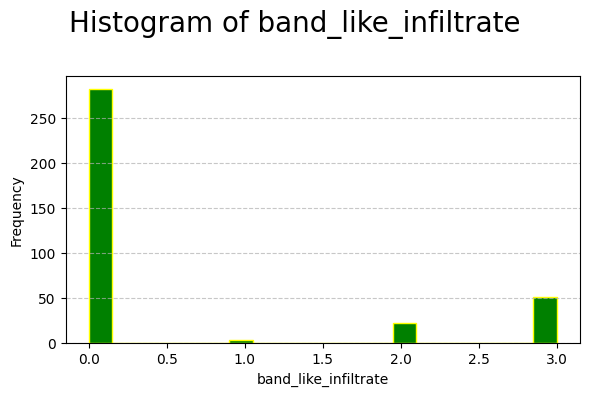

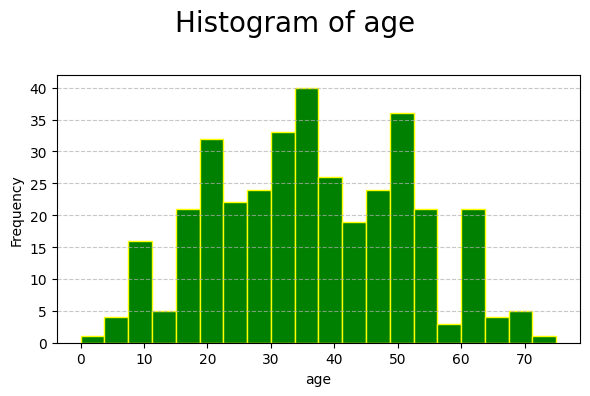

In [26]:
for column in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=20, color='green', edgecolor='yellow')
    plt.suptitle(f"Histogram of {column}",fontsize=20)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout(rect=[0,0,1,0.96])
    plt.show()


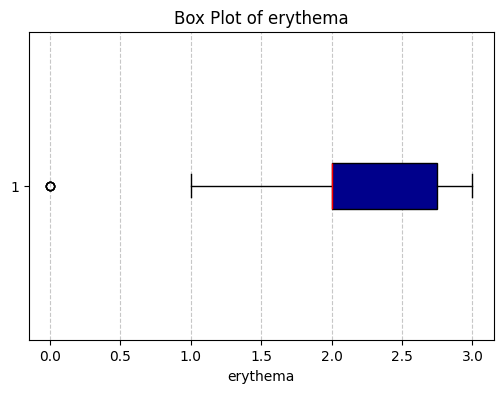

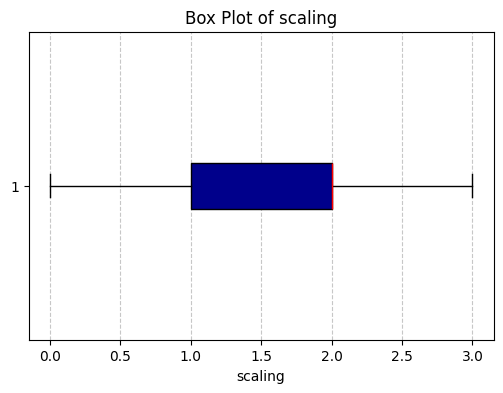

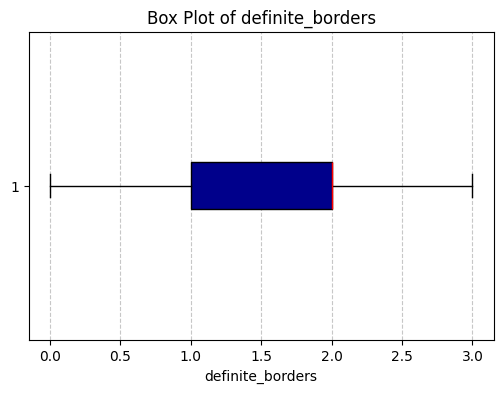

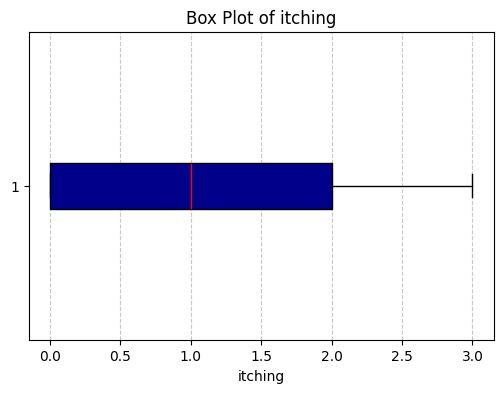

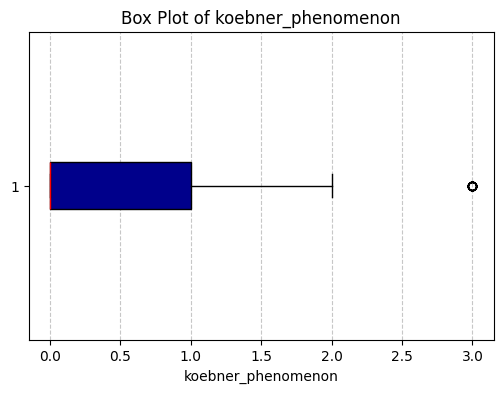

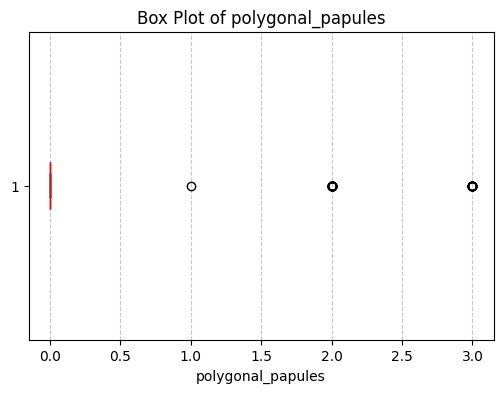

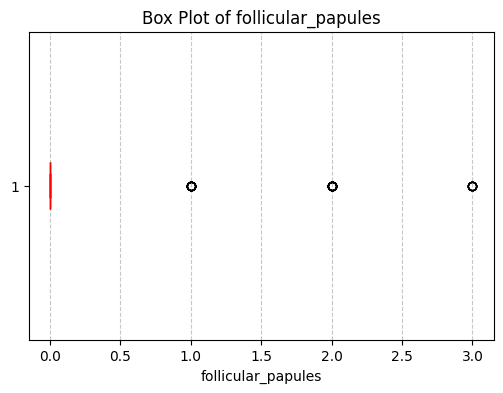

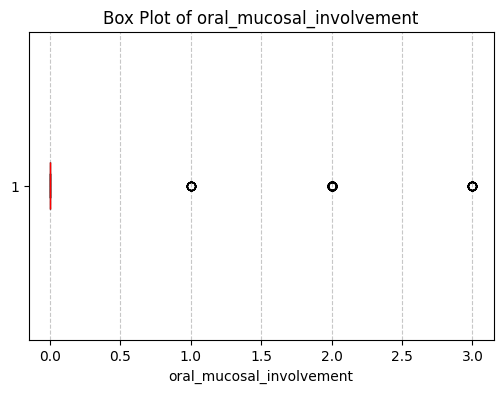

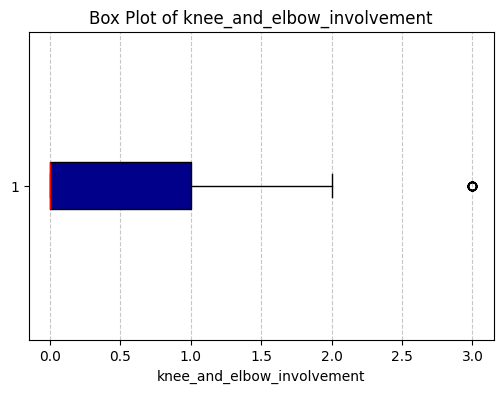

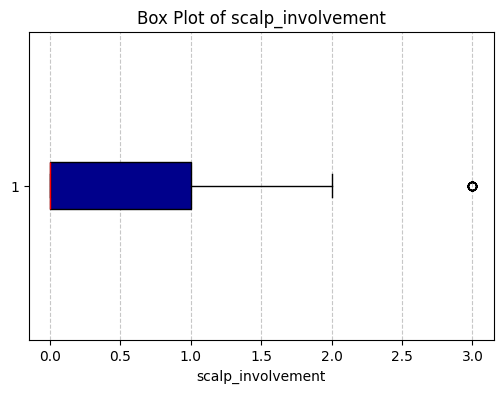

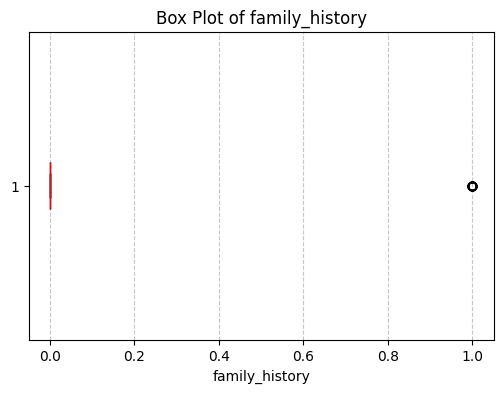

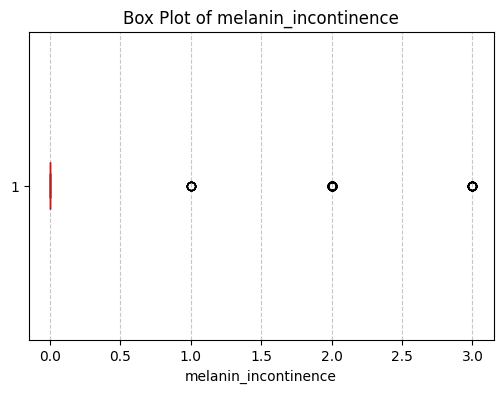

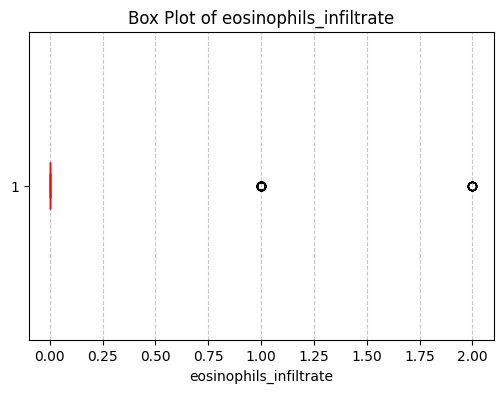

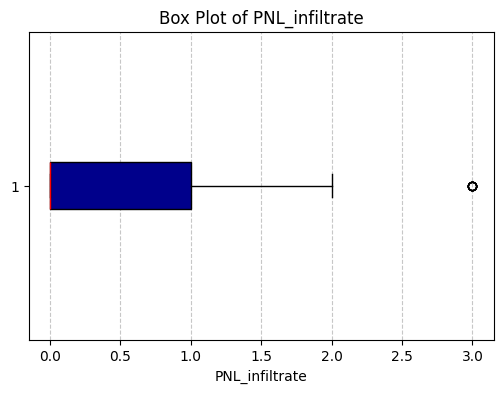

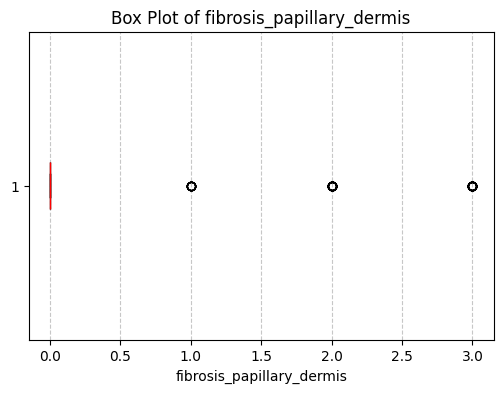

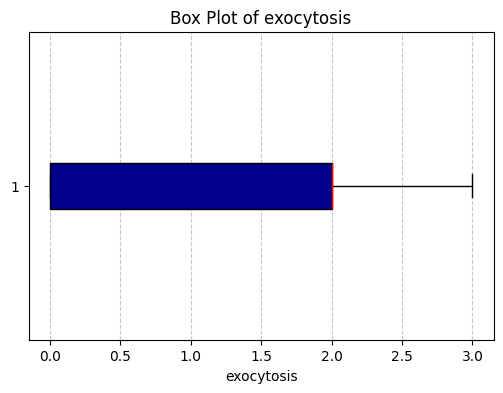

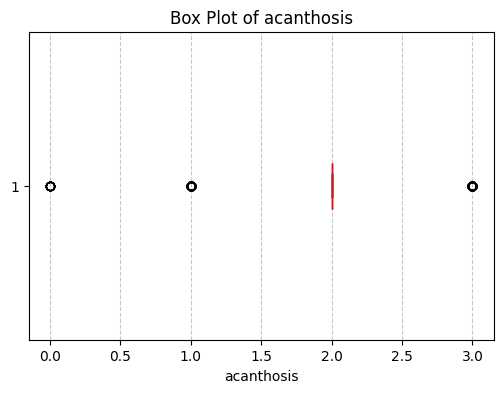

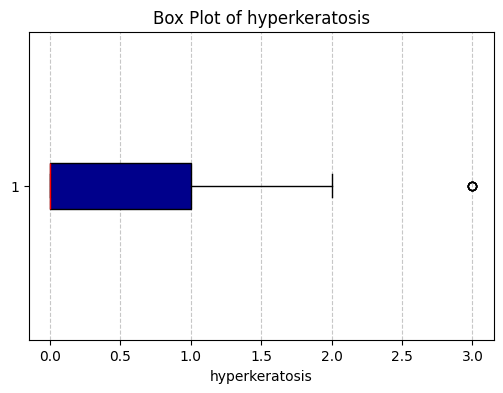

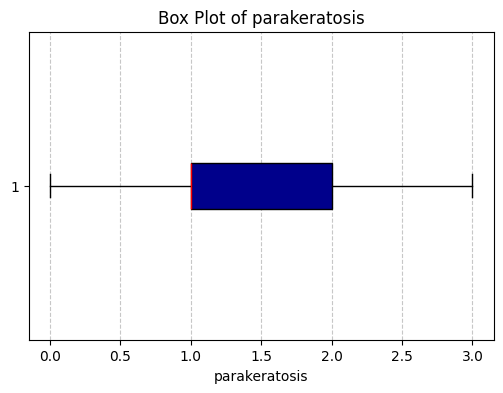

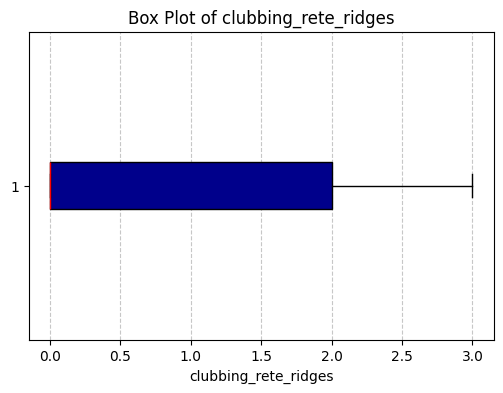

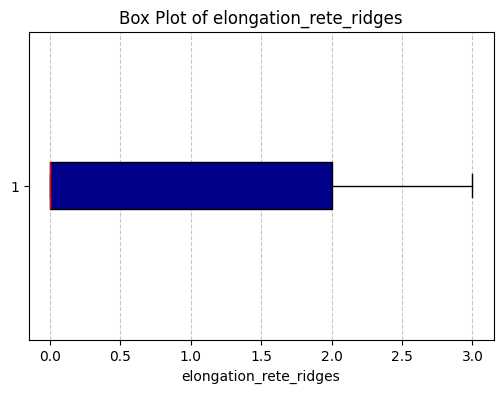

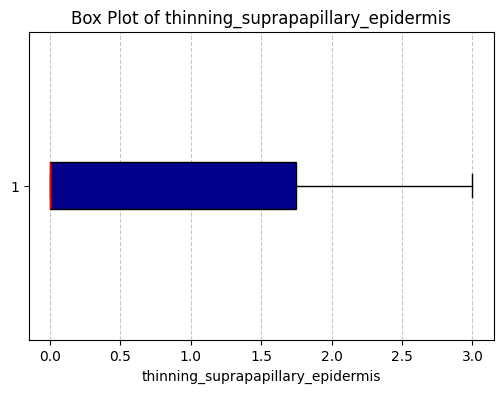

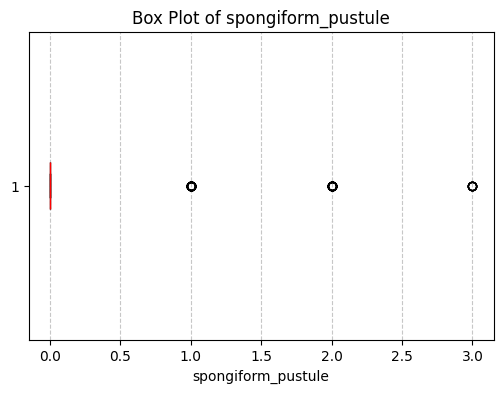

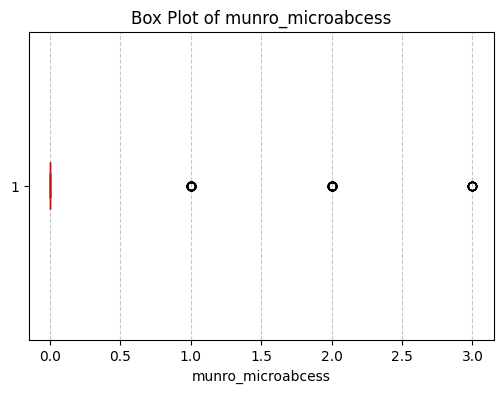

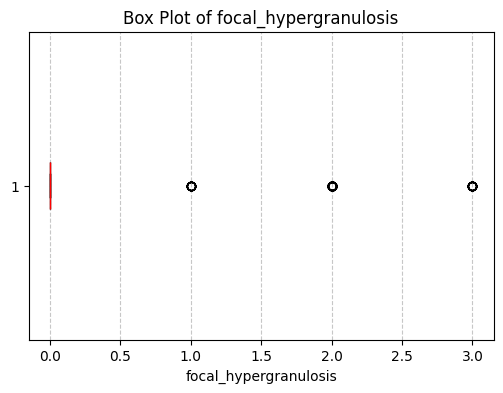

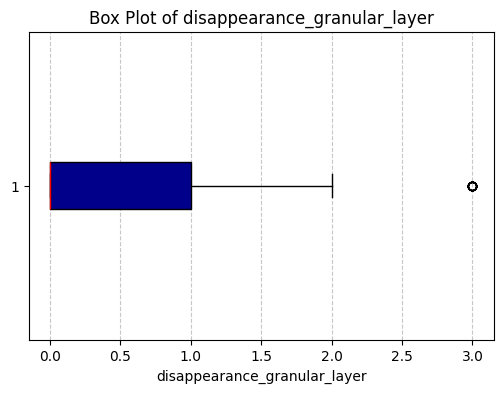

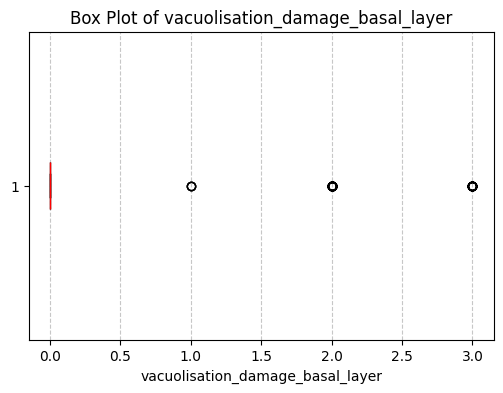

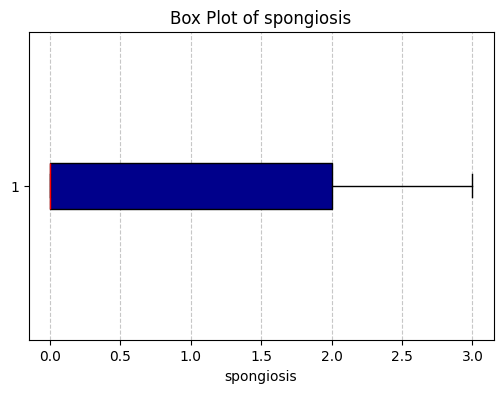

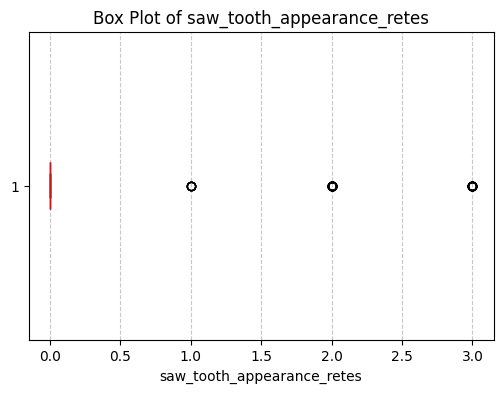

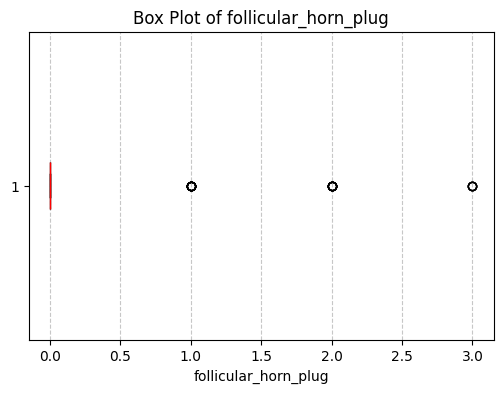

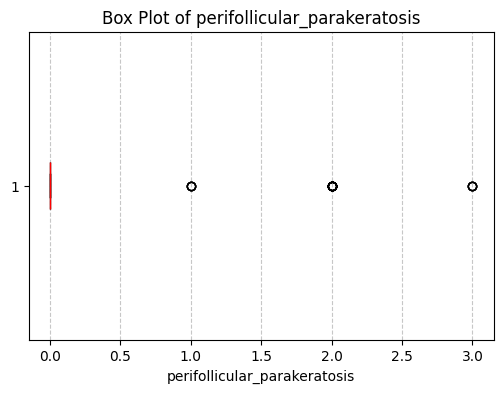

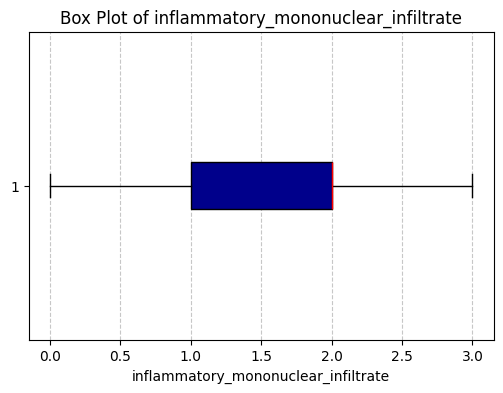

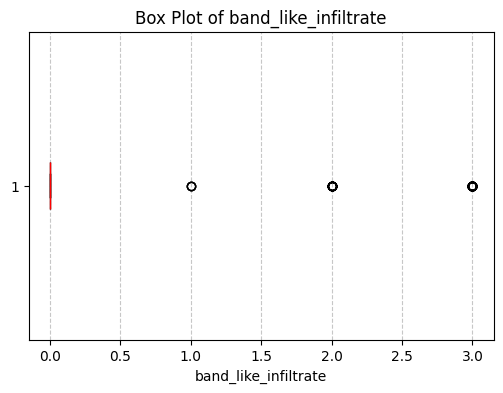

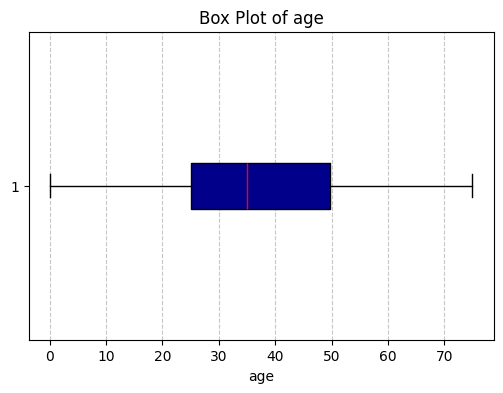

In [28]:
for column in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[column], vert=False, patch_artist=True,
                boxprops=dict(facecolor='darkblue', color='black'),
                medianprops=dict(color='red'))
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
